# 🌦️ Prédiction des Précipitations à Dhaka
## Projet de Machine Learning

---

## 1️⃣ Importation des Librairies

In [59]:
import pandas as pd
import numpy as np

# ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

---

## 2️⃣ Chargement et Exploration des Données

### 2.1 Chargement du Dataset

In [60]:
import pandas as pd

# Load the dataset
df = pd.read_csv('datasets/dhaka_weather_data_full.csv')

# Display the first few rows
df.head()

,date,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M_RANGE,WS10M,WD10M,WS10M_MAX,WS10M_MIN
0,2003-01-01,14.94,11.23,13.08,14.91,11.73,21.51,9.78,8.23,80.32,0.05,101.39,5.04,3.15,346.0,5.41,0.37
1,2003-01-02,16.02,10.83,13.42,16.18,15.79,24.62,8.83,7.98,74.34,0.00,101.68,2.03,2.39,356.3,3.45,1.42
2,2003-01-03,17.92,11.46,14.69,17.67,16.00,26.74,10.74,8.34,69.50,0.00,101.58,2.54,2.11,16.4,3.11,0.57
3,2003-01-04,18.17,11.72,14.94,17.65,11.54,25.41,13.87,8.48,68.35,0.00,101.42,2.44,1.92,305.4,3.17,0.73
4,2003-01-05,15.69,9.31,12.50,15.56,12.92,22.93,10.01,7.22,69.14,0.00,101.56,1.98,2.87,303.0,3.99,2.01


📝 **Note :** La variable cible pour prédire les précipitations est **`PRECTOTCORR`** (Precipitation Corrected). Les autres colonnes (température T2M, humidité RH2M, vitesse du vent WS10M, etc.) serviront de features pour les modèles prédictifs.

### 2.2 Dimensions du Dataset

In [61]:
print("Shape du dataset :", df.shape)

Shape du dataset : (7670, 17)


### 2.3 Informations sur les Données

In [62]:
print("--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7670 non-null   object 
 1   T2M          7670 non-null   float64
 2   T2MDEW       7670 non-null   float64
 3   T2MWET       7670 non-null   float64
 4   TS           7670 non-null   float64
 5   T2M_RANGE    7670 non-null   float64
 6   T2M_MAX      7670 non-null   float64
 7   T2M_MIN      7670 non-null   float64
 8   QV2M         7670 non-null   float64
 9   RH2M         7670 non-null   float64
 10  PRECTOTCORR  7670 non-null   float64
 11  PS           7670 non-null   float64
 12  WS10M_RANGE  7670 non-null   float64
 13  WS10M        7670 non-null   float64
 14  WD10M        7670 non-null   float64
 15  WS10M_MAX    7670 non-null   float64
 16  WS10M_MIN    7670 non-null   float64
dtypes: float64(16), object(1)
memory usage: 1018.8+ KB


### 2.4 Statistiques Descriptives

In [63]:
print("\n--- Descriptive Statistics ---")
df.describe()


--- Descriptive Statistics ---


,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M_RANGE,WS10M,WD10M,WS10M_MAX,WS10M_MIN
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,25.528542,20.073050,22.800759,25.609005,9.267767,30.540812,21.273046,15.673795,75.265302,6.127701,100.683518,2.358578,2.881494,201.996258,4.057833,1.699256
std,4.382359,6.425083,5.101669,4.691334,4.016975,3.821460,5.470897,5.498510,15.100576,11.450783,0.549889,1.039154,1.281534,94.650018,1.651256,1.102998
min,10.710000,0.850000,5.820000,11.110000,1.570000,17.990000,3.430000,4.030000,26.400000,0.000000,99.010000,0.430000,0.600000,0.000000,1.030000,0.010000
25%,22.270000,14.812500,18.620000,22.020000,5.660000,28.210000,16.640000,10.470000,65.610000,0.000000,100.240000,1.650000,1.940000,152.200000,2.860000,0.830000
50%,27.450000,22.150000,25.175000,27.525000,9.060000,30.735000,23.780000,16.710000,79.520000,1.255000,100.690000,2.170000,2.590000,183.600000,3.640000,1.560000
75%,28.630000,25.920000,27.120000,28.810000,12.620000,32.557500,25.910000,21.030000,88.050000,7.585000,101.160000,2.850000,3.620000,302.875000,5.020000,2.330000
max,34.510000,28.020000,29.220000,36.070000,21.210000,42.540000,28.250000,23.990000,95.770000,167.280000,101.930000,12.280000,10.200000,360.000000,14.610000,7.520000


### 2.5 Liste des Colonnes

In [64]:
df.columns

Index(['date', 'T2M', 'T2MDEW', 'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX',
       'T2M_MIN', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M_RANGE', 'WS10M',
       'WD10M', 'WS10M_MAX', 'WS10M_MIN'],
      dtype='object')

---

## 3️⃣ Analyse des Valeurs Manquantes

### 3.1 Valeurs Manquantes par Colonne

In [65]:
missing_values = df.isnull().sum()
print(missing_values)


date           0
T2M            0
T2MDEW         0
T2MWET         0
TS             0
T2M_RANGE      0
T2M_MAX        0
T2M_MIN        0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS10M_RANGE    0
WS10M          0
WD10M          0
WS10M_MAX      0
WS10M_MIN      0
dtype: int64


### 3.2 Colonnes avec Valeurs Manquantes

In [66]:
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


### 3.3 Colonnes avec Beaucoup de NaN (seuil > 1000)

In [67]:
nan_counts = df.isna().sum()
threshold = 1000
# Get columns with NaN counts above the threshold
columns_with_nan = nan_counts[nan_counts > threshold]
print(columns_with_nan)

Series([], dtype: int64)


### 3.4 Lignes avec Trop de NaN

In [68]:
threshold2 = 100


too_many_nans = df.isna().sum(axis=1) > threshold2

# Display rows with too many NaNs
rows_with_too_many_nans = df[too_many_nans]

print("\nRows with Too Many NaNs:")
print(rows_with_too_many_nans)

# Count the number of rows with too many NaNs
num_rows_with_too_many_nans = too_many_nans.sum()
print(f"\nNumber of Rows with Too Many NaNs: {num_rows_with_too_many_nans}")


Rows with Too Many NaNs:
Empty DataFrame
Columns: [date, T2M, T2MDEW, T2MWET, TS, T2M_RANGE, T2M_MAX, T2M_MIN, QV2M, RH2M, PRECTOTCORR, PS, WS10M_RANGE, WS10M, WD10M, WS10M_MAX, WS10M_MIN]
Index: []

Number of Rows with Too Many NaNs: 0


---

## 4️⃣ Visualisation des Données

### 4.1 Distribution de la Température (T2M)

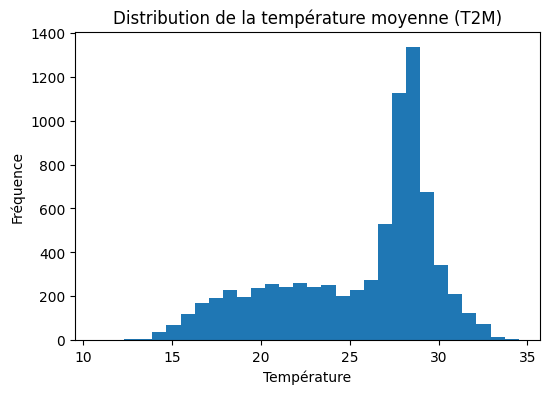

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['T2M'], bins=30)
plt.title("Distribution de la température moyenne (T2M)")
plt.xlabel("Température")
plt.ylabel("Fréquence")
plt.show()

### 4.2 Distribution des Précipitations (PRECTOTCORR)

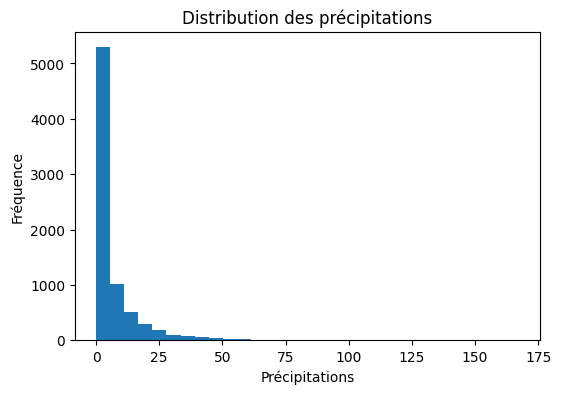

In [70]:
plt.figure(figsize=(6,4))
plt.hist(df['PRECTOTCORR'], bins=30)
plt.title("Distribution des précipitations")
plt.xlabel("Précipitations")
plt.ylabel("Fréquence")
plt.show()


### 4.3 Évolution de la Température dans le Temps

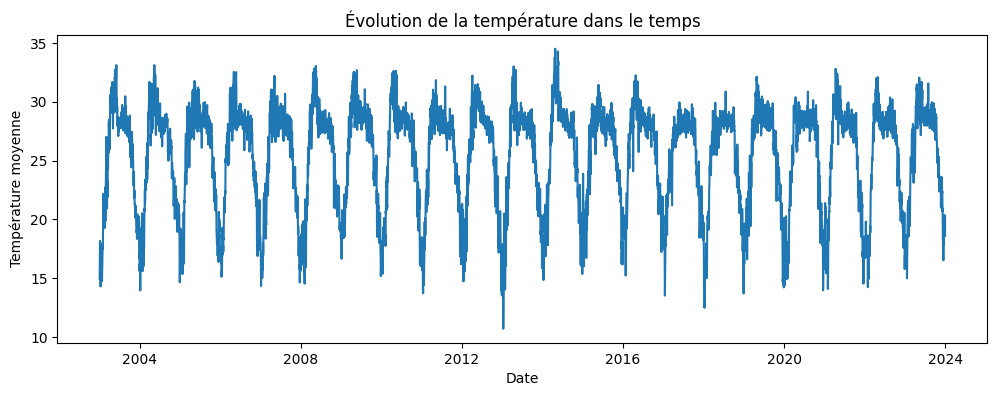

In [71]:
plt.figure(figsize=(12,4))
plt.plot(pd.to_datetime(df['date']), df['T2M'])
plt.title("Évolution de la température dans le temps")
plt.xlabel("Date")
plt.ylabel("Température moyenne")
plt.show()


### 4.4 Évolution des Précipitations dans le Temps

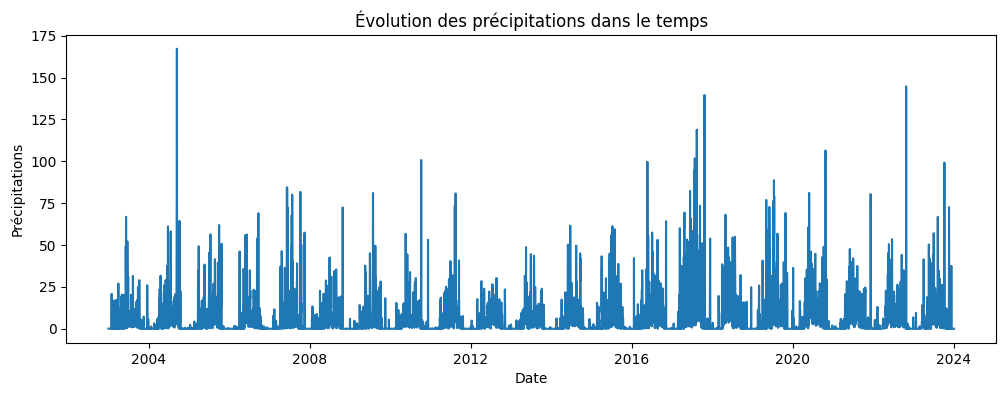

In [72]:
plt.figure(figsize=(12,4))
plt.plot(pd.to_datetime(df['date']), df['PRECTOTCORR'])
plt.title("Évolution des précipitations dans le temps")
plt.xlabel("Date")
plt.ylabel("Précipitations")
plt.show()


### 4.5 Détection des Outliers (Boxplots)

#### Température :

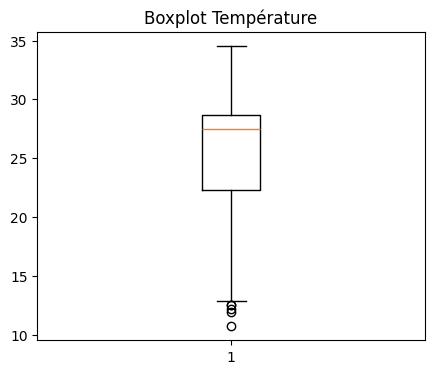

In [73]:
plt.figure(figsize=(5,4))
plt.boxplot(df['T2M'])
plt.title("Boxplot Température")
plt.show()


#### Précipitations :

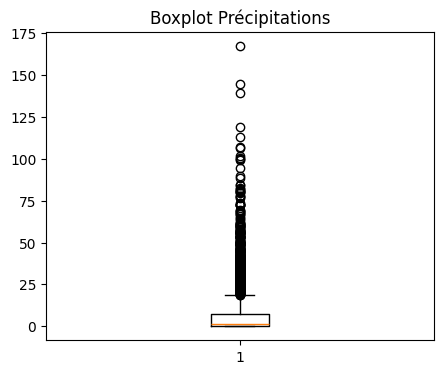

In [74]:
plt.figure(figsize=(5,4))
plt.boxplot(df['PRECTOTCORR'])
plt.title("Boxplot Précipitations")
plt.show()


---

## 5️⃣ Prétraitement des Données

### 5.1 Transformation de la Variable Cible

**Objectif :** Préparer le jeu de données pour la classification en transformant la variable cible et en gérant les colonnes non numériques.

**Étapes :**
- Transformer `PRECTOTCORR` en variable binaire `Rain`
- Convertir la colonne `date` en feature numérique `Month`
- Supprimer les colonnes originales `date` et `PRECTOTCORR`

In [75]:
# 1. Create the binary target variable 'Rain'
df['Rain'] = (df['PRECTOTCORR'] > 0).astype(int)

# 2. Handle the 'date' column
# Convert to datetime and extract the month as a numerical feature
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month

# Drop the original 'date' and the continuous 'PRECTOTCORR' column
df_processed = df.drop(columns=['date', 'PRECTOTCORR'])

# Display the first few rows of the processed dataframe
df_processed.head()

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PS,WS10M_RANGE,WS10M,WD10M,WS10M_MAX,WS10M_MIN,Rain,Month
0,14.94,11.23,13.08,14.91,11.73,21.51,9.78,8.23,80.32,101.39,5.04,3.15,346.0,5.41,0.37,1,1
1,16.02,10.83,13.42,16.18,15.79,24.62,8.83,7.98,74.34,101.68,2.03,2.39,356.3,3.45,1.42,0,1
2,17.92,11.46,14.69,17.67,16.00,26.74,10.74,8.34,69.50,101.58,2.54,2.11,16.4,3.11,0.57,0,1
3,18.17,11.72,14.94,17.65,11.54,25.41,13.87,8.48,68.35,101.42,2.44,1.92,305.4,3.17,0.73,0,1
4,15.69,9.31,12.50,15.56,12.92,22.93,10.01,7.22,69.14,101.56,1.98,2.87,303.0,3.99,2.01,0,1


### 5.2 Vérification de l'Équilibre des Classes

In [76]:
print("--- Class Balance (Rain) ---")
print(df_processed['Rain'].value_counts(normalize=True) * 100)
print("\n--- Feature Data Types ---")
print(df_processed.dtypes)

--- Class Balance (Rain) ---
Rain
1    64.94133
0    35.05867
Name: proportion, dtype: float64

--- Feature Data Types ---
T2M            float64
T2MDEW         float64
T2MWET         float64
TS             float64
T2M_RANGE      float64
T2M_MAX        float64
T2M_MIN        float64
QV2M           float64
RH2M           float64
PS             float64
WS10M_RANGE    float64
WS10M          float64
WD10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
Rain             int64
Month            int32
dtype: object


📊 **Résumé du Prétraitement :**

| Étape | Description |
|-------|-------------|
| Transformation de la cible | `PRECTOTCORR` → variable binaire `Rain` (1 si précipitations > 0) |
| Ingénierie de features | Extraction du mois (`Month`) à partir de la date |
| Équilibre des classes | ~64.9% jours pluvieux vs ~35.1% sans pluie |
| Types de données | Toutes les features sont numériques (float ou int) |

### 5.3 Matrice de Corrélation

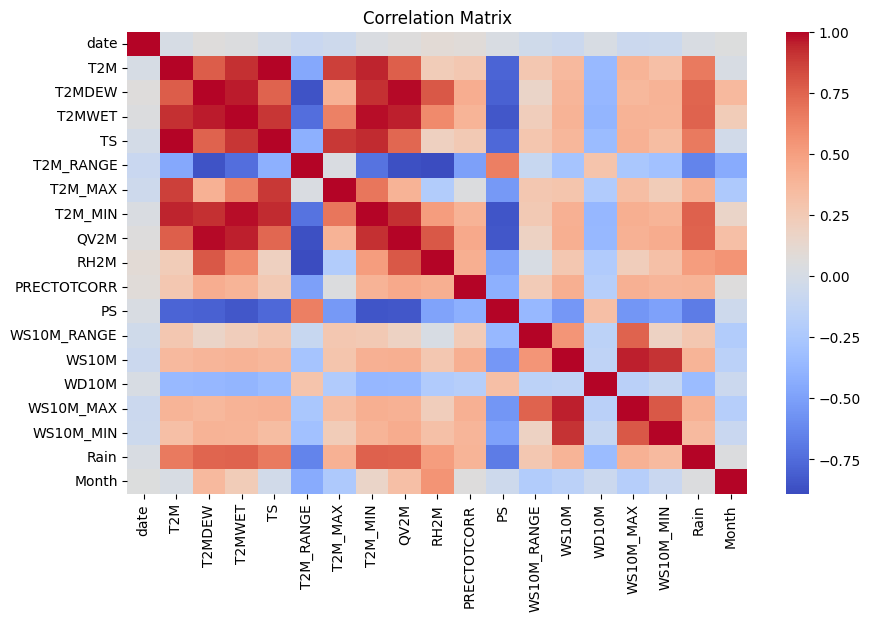

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### 5.4 Normalisation des Données (StandardScaler)

In [78]:
from sklearn.preprocessing import StandardScaler

# 1. Separate features (X) and target (y)
X = df_processed.drop(columns=['Rain'])
y = df_processed['Rain']

# 2. Initialize and apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Verify normalization (Mean ~ 0, Std ~ 1)
print(f"Mean of scaled features: {X_scaled.mean():.4f}")
print(f"Standard Deviation of scaled features: {X_scaled.std():.4f}")

# Display the shape of X and y
print(f"\nShape of X: {X_scaled.shape}")
print(f"Shape of y: {y.shape}")

Mean of scaled features: -0.0000
Standard Deviation of scaled features: 1.0000

Shape of X: (7670, 16)
Shape of y: (7670,)


### 5.5 Division du Jeu de Données (Train/Test Split)

**Configuration :** 85% entraînement / 15% test

In [79]:
from sklearn.model_selection import train_test_split

# Split the data into training (85%) and testing (15%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Verify the split by printing the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6519, 16)
X_test shape: (1151, 16)
y_train shape: (6519,)
y_test shape: (1151,)


📋 **Résumé de la Division :**

| Ensemble | Échantillons | Pourcentage |
|----------|-------------|-------------|
| Entraînement | 6519 | 85% |
| Test | 1151 | 15% |

> 🔧 `random_state=42` pour garantir la reproductibilité

---

## 6️⃣ Entraînement des Modèles de Machine Learning

### 6.1 Fonction d'Évaluation

In [80]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} ---")
    print(classification_report(y_true, y_pred))

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Overall Accuracy: {accuracy:.4f}")

    return {
        "model": name,
        "accuracy": accuracy
    }


### 6.2 AdaBoost Classifier

In [81]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

res_ada = evaluate_model("AdaBoost", y_test, y_pred_ada)



AdaBoost ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       411
           1       0.94      0.90      0.92       740

    accuracy                           0.90      1151
   macro avg       0.89      0.90      0.89      1151
weighted avg       0.90      0.90      0.90      1151

Overall Accuracy: 0.8983


### 6.3 Gradient Boosting Classifier

In [82]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

res_gb = evaluate_model("Gradient Boosting", y_test, y_pred_gb)


Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       411
           1       0.94      0.91      0.92       740

    accuracy                           0.91      1151
   macro avg       0.89      0.90      0.90      1151
weighted avg       0.91      0.91      0.91      1151

Overall Accuracy: 0.9053


### 6.4 Réseau de Neurones Artificiels (ANN / MLP)

In [83]:
# ANN
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)
res_ann = evaluate_model("ANN", y_test, y_pred_ann)


ANN ---
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       411
           1       0.95      0.91      0.93       740

    accuracy                           0.91      1151
   macro avg       0.90      0.91      0.90      1151
weighted avg       0.91      0.91      0.91      1151

Overall Accuracy: 0.9105


### 6.5 Random Forest Classifier

In [84]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
res_rf = evaluate_model("Random Forest", y_test, y_pred_rf)


Random Forest ---
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       411
           1       0.94      0.90      0.92       740

    accuracy                           0.90      1151
   macro avg       0.89      0.90      0.90      1151
weighted avg       0.91      0.90      0.90      1151

Overall Accuracy: 0.9036


### 6.6 K-Nearest Neighbors (KNN)

In [85]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
res_knn = evaluate_model("KNN", y_test, y_pred_knn)


KNN ---
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       411
           1       0.95      0.90      0.93       740

    accuracy                           0.91      1151
   macro avg       0.90      0.91      0.90      1151
weighted avg       0.91      0.91      0.91      1151

Overall Accuracy: 0.9088


---

## 7️⃣ Déploiement

### 7.1 Comparaison des Modèles

In [86]:
# Comparaison des performances des modèles
results = [res_ada, res_gb, res_ann, res_rf, res_knn]

print("=" * 50)
print("📊 COMPARAISON DES MODÈLES")
print("=" * 50)

for res in sorted(results, key=lambda x: x['accuracy'], reverse=True):
    print(f"{res['model']:25} : {res['accuracy']*100:.2f}%")

# Identifier le meilleur modèle
best_result = max(results, key=lambda x: x['accuracy'])
print(f"\n🏆 Meilleur modèle : {best_result['model']} avec {best_result['accuracy']*100:.2f}% de précision")

📊 COMPARAISON DES MODÈLES
ANN                       : 91.05%
KNN                       : 90.88%
Gradient Boosting         : 90.53%
Random Forest             : 90.36%
AdaBoost                  : 89.83%

🏆 Meilleur modèle : ANN avec 91.05% de précision


### 7.2 Sauvegarde du Modèle et du Scaler

Pour utiliser le modèle dans l'application Streamlit, nous devons sauvegarder :
- Le meilleur modèle entraîné (Random Forest)
- Le scaler utilisé pour normaliser les données
- La liste des features

In [87]:
import joblib
import os

# Créer le dossier models s'il n'existe pas
os.makedirs('models', exist_ok=True)

# Sauvegarder le meilleur modèle (Random Forest)
joblib.dump(rf, 'models/rain_prediction_model.pkl')

# Sauvegarder le scaler
joblib.dump(scaler, 'models/scaler.pkl')

# Sauvegarder les noms des features
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'models/feature_names.pkl')

print("✅ Modèle sauvegardé : models/rain_prediction_model.pkl")
print("✅ Scaler sauvegardé : models/scaler.pkl")
print("✅ Features sauvegardées : models/feature_names.pkl")
print(f"\n📋 Liste des features ({len(feature_names)}) :")
for i, feat in enumerate(feature_names, 1):
    print(f"   {i}. {feat}")

✅ Modèle sauvegardé : models/rain_prediction_model.pkl
✅ Scaler sauvegardé : models/scaler.pkl
✅ Features sauvegardées : models/feature_names.pkl

📋 Liste des features (16) :
   1. T2M
   2. T2MDEW
   3. T2MWET
   4. TS
   5. T2M_RANGE
   6. T2M_MAX
   7. T2M_MIN
   8. QV2M
   9. RH2M
   10. PS
   11. WS10M_RANGE
   12. WS10M
   13. WD10M
   14. WS10M_MAX
   15. WS10M_MIN
   16. Month


### 7.3 Interface Streamlit

L'application Streamlit a été créée dans le fichier `app.py`. Pour la lancer :

```bash
streamlit run app.py
```

L'interface permet de :
- 🌡️ Saisir les paramètres météorologiques
- 🔮 Prédire s'il va pleuvoir ou non
- 📊 Visualiser les probabilités de prédiction